[Table of Contents](table_of_contents.ipynb)

# Topic 23.  Quadratic Forms
Author: Timothy Devon Morris, devonmorris1992@gmail.com

In [1]:
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

##  Introduction
A Quadratic form is simply a homogeneous polynomial of degree two. Quadratic forms appear in various branches of mathematics, such as differential geometry, optimization theory, probability theory, control theory and stability of dynamical systems. The geometry of quadratic forms is rich in both its applications and theory.

## Explanation of the theory

### Homogeneous polynomials
A homogeneous polynomial is polynomial whos nonzero terms have the same degree. In the case of quadratic forms, this degree must be two. For example, consider the polynomial

$$
R(x,y) = x^2 + xy + y^2.
$$

In this polynomial, every nonzero term has degree two, therefore it is a quadratic form. We can rewrite this equation as a matrix equation
$$
R(x,y) = 
\begin{bmatrix}
x & y
\end{bmatrix}
\begin{bmatrix}
1 & 0.5 \\
0.5 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$
Let $\mathbf{x} = [x, y]^T$ and
$$
A = 
\begin{bmatrix}
1 & 0.5 \\
0.5 & 1
\end{bmatrix}
$$
Then we can rewrite this polynomial as
$$
R(\mathbf{x}) = \mathbf{x}^T A\mathbf{x}
$$
We call this the quadratic form associated with the self-adjoint matrix $A$. In general, $\mathbf{x}$ can be of any dimension and the only requirement on $A$ is that it is self-adjoint (symmetric in the real case).

### Geometry of Quadratic forms and Definiteness
The geometry of quadratic forms is rich in its structure. We can only visualize this geometry in two dimensions, but the ideas easily scale to the higher dimensional case. In the simplest case, we have
$$
A = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$
The level curves of the quadratic form associated with this matrix are

<IPython.core.display.Javascript object>


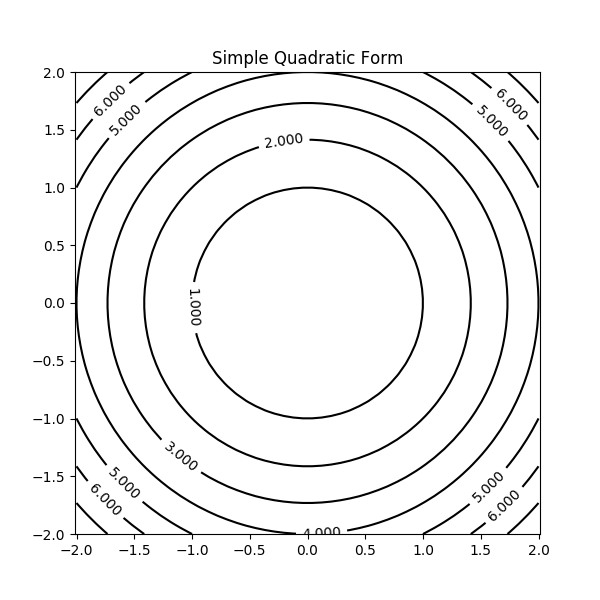

In [2]:
def plot_qform(A, title):
    axx = A[0,0]
    ayy = A[1,1]
    axy = 2*A[0,1]
    x = np.linspace(-2, 2)
    y = np.linspace(-2, 2)
    X, Y = np.meshgrid(x,y)
    Z = axx*X**2 + axy*X*Y + ayy*Y**2
    fig, ax = plt.subplots(figsize=(6,6))
    CS = ax.contour(X, Y, Z, colors='k')
    ax.clabel(CS, inline=1, fontsize=10)
    plt.title(title)
    plt.axis('equal')
    plt.show()

A = np.eye(2)
plot_qform(A, "Simple Quadratic Form")

Since the level curves are all positive in this picture we have that $\mathbf{x}^HA\mathbf{x} > 0, \ \forall \mathbf{x} \in \mathbb{R}^n \setminus \{0\}$. We call such a quadtratic form _positive definite_. We can also plot this quadratic form as a surface in three dimensions.

<IPython.core.display.Javascript object>


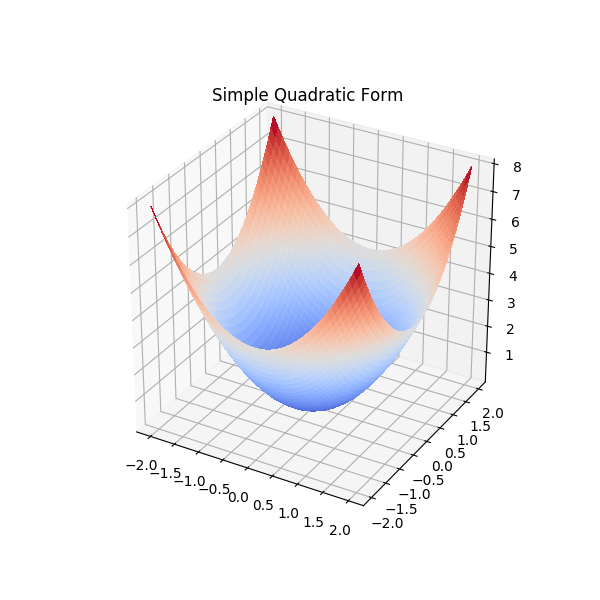

In [3]:
def plot_qform3d(A, title):
    axx = A[0,0]
    ayy = A[1,1]
    axy = 2*A[0,1]
    x = np.linspace(-2, 2)
    y = np.linspace(-2, 2)
    X, Y = np.meshgrid(x,y)
    Z = axx*X**2 + axy*X*Y + ayy*Y**2
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    plt.title(title)
    plt.axis('equal')
    plt.show()
    
plot_qform3d(A, "Simple Quadratic Form")

Just as there are positive definite quadratic forms, we can make _negative definite_ quadtratic forms. These are quadratic forms that satisfy  For example let $\mathbf{x}^TA\mathbf{x} < 0, \ \forall \mathbf{x} \in \mathbf{R}^n \setminus \{0\}$. For example let
$$
A =
\begin{bmatrix}
-1 & 0 \\
0 & -1
\end{bmatrix}.
$$
We can plot the level curves of this quadratic form as

<IPython.core.display.Javascript object>


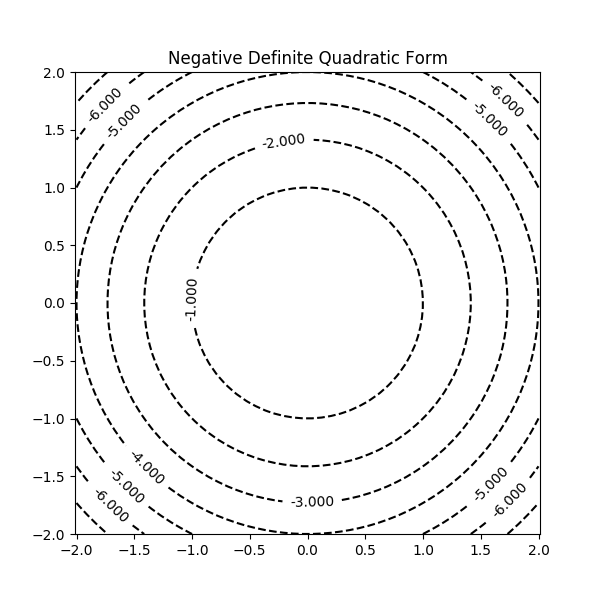

In [4]:
A = -np.eye(2)
plot_qform(A, "Negative Definite Quadratic Form")

The dashed lines show that the quadratic form is negative. Plotting the surface in three dimensions we see an inverted picture from the positive definite case.

<IPython.core.display.Javascript object>


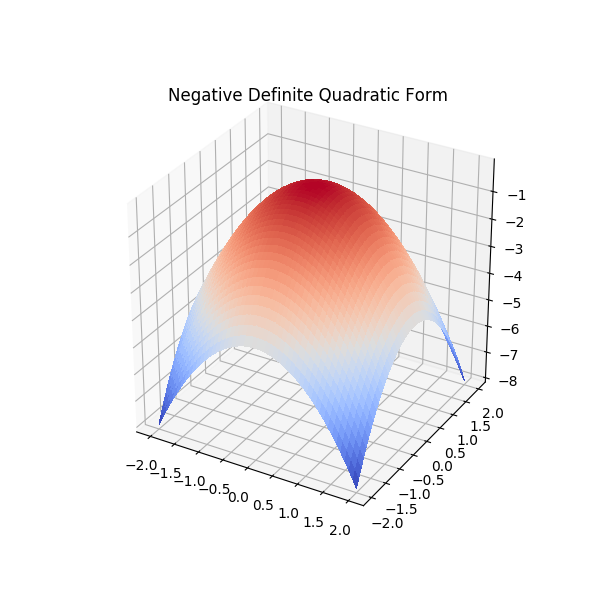

In [5]:
plot_qform3d(A, "Negative Definite Quadratic Form")

If the quadratic form is neither positive definite nor negative definite we have an _indefinite_ quadratic form. For example, consider the case where
$$
A =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}.
$$
Plotting the contours of this form we see a much different picture than the positive definite and negative definite cases.

<IPython.core.display.Javascript object>


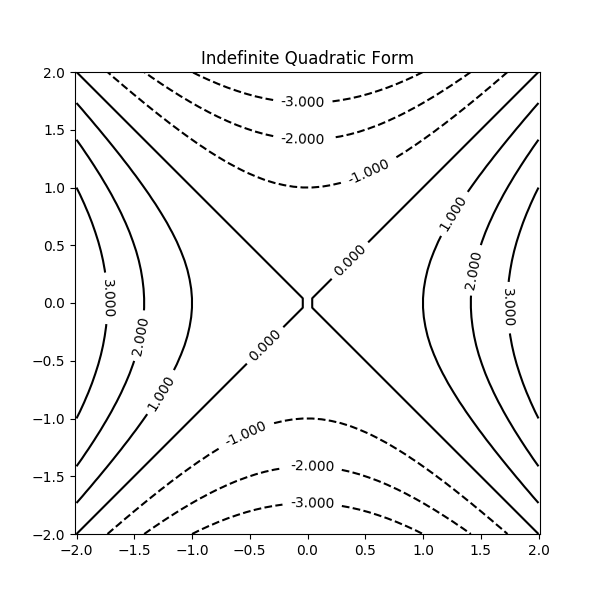

In [6]:
A = np.eye(2)
A[1,1] = -1
plot_qform(A, "Indefinite Quadratic Form")

Plotting this form in three dimensions we see that it attains both positive and negative values.

<IPython.core.display.Javascript object>


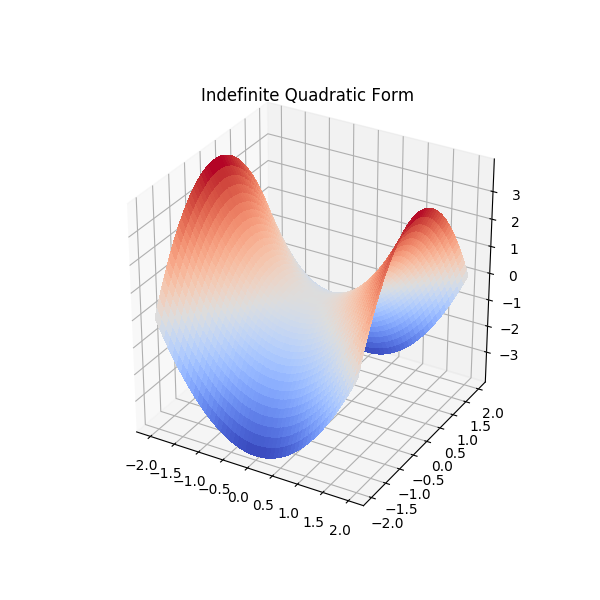

In [7]:
plot_qform3d(A, "Indefinite Quadratic Form")

This surface makes the shape of a saddle, that's precisely why we call the point $[0, 0]$ a saddle point. Indefinite quadratic forms appear frequently in higher dimesions. There are also quadratic forms that are _positive semi-definite_ and _negative semi-definite_, this means that $\mathbf{x}^TA\mathbf{x} \geq 0, \ \forall \mathbf{x} \in \mathbb{R}^n$ and $\mathbf{x}^TA\mathbf{x} \leq 0, \ \forall \mathbf{x} \in \mathbb{R}^n$. The set of positive definite quadratic forms are a subset of positive semi-definite quadratic forms and similarly for negative definite quadratic forms. We also say that a matrix $A$ is positive (negative) definite if its associated quadratic form is positive (negative) definite.

### Eigendecomposition and More Geometry

The beauty of quadratic forms is that we can determine their definiteness by analyzing the spectral properties of their matrix $A$. This is much easier than plotting their contours and analyzing their surfaces. We have the following theorem

**Theorem**: A matrix $A$ is positive (negative) definite if and only if all of its eigenvalues are positive (negative)

**Proof**: Let $A$ be a positive definite matrix and let $\mathbf{v}$ be an unit eigenvector of $A$, with associated eigenvalue $\lambda$. We have that
$$
\mathbf{v}^TA\mathbf{v} = \mathbf{v}^T\lambda \mathbf{v} = \lambda > 0
$$
Thus, all the eigenvalues are positive. Now suppose that the matrix $A$ has positive eigenvalues. Since $A$ is symmetric, we have that $A$ has an eigendecomposition $A = Q\Lambda Q^T$, where all the eigenvectors are orthogonal. We note that the eigenbasis spans the whole space. Thus we can write an arbitrary $\mathbf{x} \neq 0$ in terms of the eigenbasis for $A$. So let 
$$
\mathbf{x} = \alpha_1 \mathbf{v}_1 + \dots + \alpha_n \mathbf{v}_n
$$
Where the $\mathbf{v}_i$ are the eigenvectors of $A$. Since the eigenvectors are orthogonal we have
$$
\mathbf{x}^TA\mathbf{x} = \left( \alpha_1 \mathbf{v}_1 + \dots + \alpha_n \mathbf{v}_n\right)^TA\left( \alpha_1 \mathbf{v}_1 + \dots + \alpha_n \mathbf{v}_n\right) = \sum_{i=1}^n \alpha_i^2 \mathbf{v}_i^T A \mathbf{v}_i = \sum_{i=1}^n \alpha_i^2 \lambda_i
$$
Since we have $\mathbf{x} \neq 0$, we have that not all $\alpha_i$ are zero. Since $\lambda_i > 0 \ \forall i$
$$
\mathbf{x}^TA\mathbf{x} > 0
$$
Therefore a matrix is positive definite if and only if its eigenvalues are positive. Now we note that the eigenvalues of $-A$ are $-\lambda_i$ and the eigenvectors are the same. We also note that if $\mathbf{x}^TA\mathbf{x} > 0$ then we have that $\mathbf{x}^T(-A)\mathbf{x} < 0$. Using these two facts, the negative case holds as well.

A similar result holds for positive semi-definite and negative semi-definite matrices, we just add the caveat that the eigenvalues can equal 0. In the previous section, the quadratic forms were fairly easily to analyze by inspection, since we used simple transformations of the identity matrix. However, when presented with a matrix such as 
$$
A =
\begin{bmatrix}
1.4 & -0.3 \\
-0.3 & 0.6
\end{bmatrix},
$$
it can be diffcult to tell the definiteness of this matrix by inspection. Plotting it we see that it is in fact positive definite.

<IPython.core.display.Javascript object>


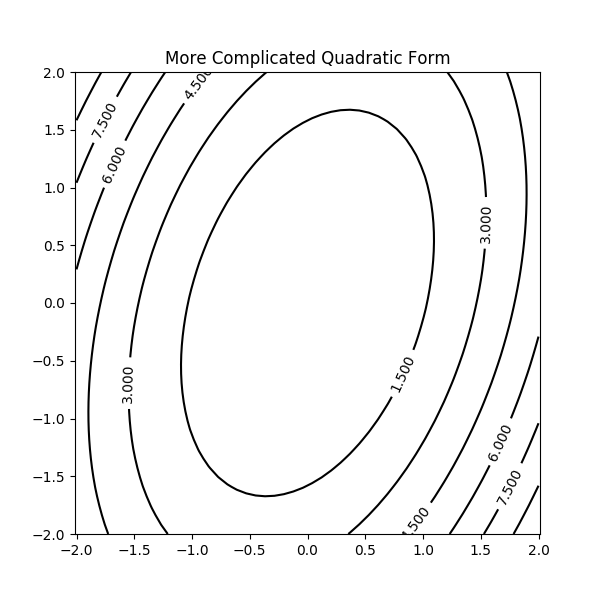

<IPython.core.display.Javascript object>


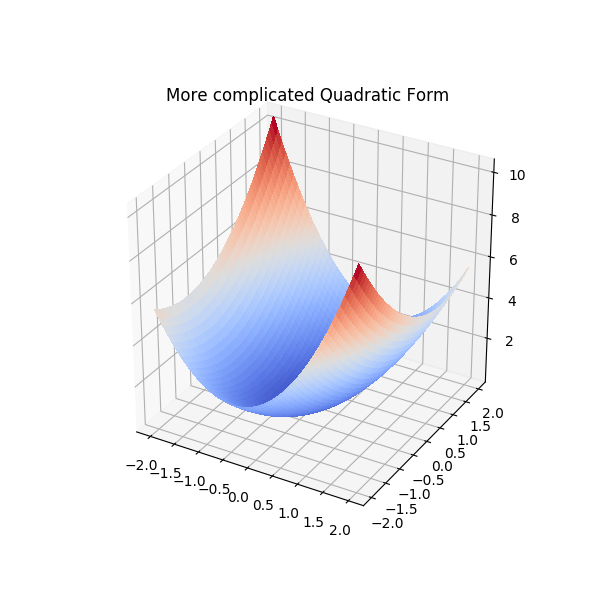

In [8]:
A = np.array([[1.4, -0.3], [-0.3, 0.6]])
plot_qform(A, "More Complicated Quadratic Form")
plot_qform3d(A, "More complicated Quadratic Form")

However, we don't always have an advanced plotting system available to us. The eigenvalues and eigenvectors of this matrix are 
$$
\lambda_1 = 1.5 \quad \mathbf{v}_1 =
\begin{bmatrix}
0.9487 \\
-0.3162
\end{bmatrix}
$$
$$
\lambda_2 = 0.5 \quad \mathbf{v}_2 =
\begin{bmatrix}
0.3162 \\
0.9487
\end{bmatrix}
$$

Now let
$$
Q =
\begin{bmatrix}
0.9487 & 0.3162 \\
-0.3162 & 0.9387
\end{bmatrix}
$$
and 
$$
\Lambda =
\begin{bmatrix}
1.5 & 0 \\
0 & 0.5
\end{bmatrix}
$$

Thus we have our eigendecomposition $A = Q\Lambda Q^T$. We can rewrite our quadratic form as
$$
\mathbf{x}^T A \mathbf{x} = \mathbf{x}^T Q \Lambda Q^T\mathbf{x} = \mathbf{y}^T \Lambda \mathbf{y}
$$
if we let $\mathbf{y} = Q^T \mathbf{x}$. In this form, it's very obvious that $A$ is positive definite. We can plot the quadratic form under this new transformation $\mathbf{y} = Q^T \mathbf{x}$.

<IPython.core.display.Javascript object>


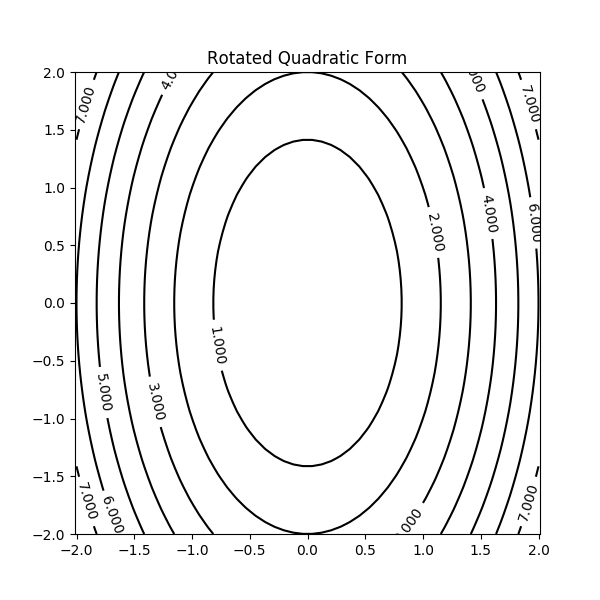

In [9]:
A = np.array([[1.5, 0],[0, 0.5]])
plot_qform(A, "Rotated Quadratic Form")

This plot shows that the eigenbasis constitutes a rotation of the original quadratic form. We can also plot the eigenbasis on the original quadratic form.

<IPython.core.display.Javascript object>


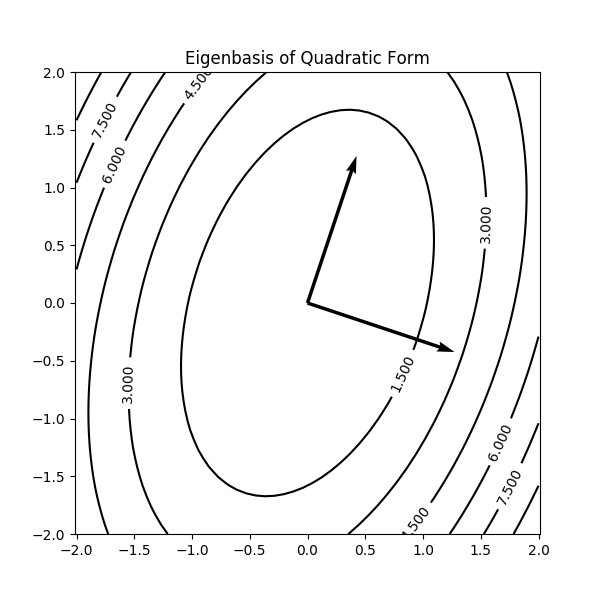

In [10]:
A = np.array([[1.4, -0.3], [-0.3, 0.6]])
Q = np.array([[0.9486833 , 0.31622777],[-0.31622777, 0.9486833]])

def plot_qform_axes(A, Q, title):
    axx = A[0,0]
    ayy = A[1,1]
    axy = 2*A[0,1]
    x = np.linspace(-2, 2)
    y = np.linspace(-2, 2)
    X, Y = np.meshgrid(x,y)
    Z = axx*X**2 + axy*X*Y + ayy*Y**2
    fig, ax = plt.subplots(figsize=(6,6))
    CS = ax.contour(X, Y, Z, colors='k')
    ax.clabel(CS, inline=1, fontsize=10)
    origin = [0], [0]
    ax.quiver(*origin, Q[0,:], Q[1,:], color='k', scale=3)
    plt.title(title)
    plt.axis('equal')
    plt.show()
    
plot_qform_axes(A, Q, "Eigenbasis of Quadratic Form")

From this plot, we can see that the ellipse has a longer axis in the direction of the eigenvector with smaller associated eigenvalue. This is because the quadratic form grows slowest in the direction of the eigenvector with smallest eigenvalue. Similarly, the ellipse's shorter axis is the eigenvector with the larger eigenvalue. This is because the quadratic form grows quickest in this direction. This concept generalizes to higher dimensions.

## Simple Numerical Examples

Now that we know we can analyze the quadratic form associated with a matrix by simply lookin at its spectral properties, we can use python to find the spectrum of a matrix. Consider the matrix
$$
A =
\begin{bmatrix}
2 & -1 & 0 \\
-1& 2 & -1 \\
0 & -1 & 2
\end{bmatrix}
$$
In python, we can analyze the spectrum of this matrix using the `numpy.linalg.eig` function.

In [11]:
import numpy.linalg as la
A = np.array([[2., -1., 0.],
              [-1., 2., -1.],
              [0., -1., 2.]])
la.eig(A)

(array([3.41421356, 2.        , 0.58578644]),
 array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  4.05925293e-16,  7.07106781e-01],
        [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]]))

Thus we have that this matrix is positive definite. This would have been impossible to plot and time consuming to solve by hand. Now consider the matrix

$$
\begin{bmatrix}
2 & 1 & -1 \\
1 & 4 & -3 \\
-1 & -3 & 4
\end{bmatrix}
$$

Using the `numpy.linalg.eig` function gives us

In [12]:
A = np.array([[2., 1., -1],
              [1., 2., -3.],
              [-1., -3., 4.]])
la.eig(A)

(array([ 6.58774145,  1.60179257, -0.18953402]),
 array([[ 0.29152938,  0.94907855, -0.11941745],
        [ 0.56721933, -0.07099407,  0.82050111],
        [-0.77024208,  0.30693606,  0.55903255]]))

Which tells us that the matrix is indefinite.

## Application: Lyapunov Theory

### Dynamical Systems and Equilibrium Points

We will now show how quadratic forms can be applied to stability theory of dynamical systems. First, we must start with a few definitions. Consider the autonomous (time-invariant) system given by

$$
\dot{\mathbf{x}} = f(\mathbf{x})
$$
and suppose that this system meets the criteria to have a unique solution given some initial condition $\mathbf{x}_0$ (namely that it is lipschitz). A point $\bar{\mathbf{x}}$ is an equilibrium point if 
$$
f(\bar{\mathbf{x}}) = \mathbf{0}
$$
In the case where $\bar{\mathbf{x}} \neq \mathbf{0}$ we can shift the system to the origin by the transformation $\mathbf{y} = \mathbf{x} - \bar{\mathbf{x}}$, and we get the new system
$$
\dot{\mathbf{y}} = \dot{\mathbf{x}} - \dot{\bar{\mathbf{x}}} = f(\mathbf{x}) - \mathbf{0} = f(\mathbf{y} + \bar{\mathbf{x}})
$$
So we can convert any equilibrium point to an equilibrium point of a system around the origin. Thus without loss of generality, we will assume that our equilibrium point $\bar{\mathbf{x}} = \mathbf{0}$

### Stability of Equilibrium Points
It is important to be able to classify these equilibrium points so that we can qualitatively determine how the system will behave. Stability is a desirable property of equilibrium points since we can conclude that within some region the system will stay near this equilibrium point. An equilibrium point $\bar{\mathbf{x}} = 0$ is stable if for every $\epsilon > 0$ we can find a $\delta = \delta(\epsilon) > 0$ such that
$$
||\mathbf{x}_0|| < \delta \rightarrow ||\mathbf{x}(t)|| < \epsilon, \ \forall t > 0
$$
A more desireable condition is _asymptotic stability_. An equilibrium point is asymptotically stable if it stable and there exists a $\delta > 0$ such that
$$
||\mathbf{x}_0|| < \delta \rightarrow \lim_{t \to \infty} \mathbf{x}(t) = \mathbf{0}
$$

### Lyapunov Functions
A lyapunov function is a positive definite function $V(\mathbf{x}) > 0\ \forall \mathbf{x} \in \mathbb{R}^n \setminus \{\mathbf{0}\}$, that can be used to prove the stability of a dynamical system. Since postive definite matrices have an associated positive definite quadratic form, in many cases we can use positive definite matrices to prove stability of dynamical systems. The basic idea is as follows. Let $V(\mathbf{x})$ be a positive definite function. If $\dot{V}(\mathbf{x}) < 0\ \forall \mathbf{x} \in \mathbb{R}^n \setminus \{\mathbf{0}\}$, then the equilibrium point $\bar{\mathbf{x}} = \mathbf{0}$ is asymptotically stable. This is proven explicitly in Khalil's Nonlinear Systems. We can, however, make an argument of the validity of this theorem if we analyze $\dot{V}(\mathbf{x})$. By the chain rule, we have that
$$
\dot{V}(\mathbf{x}) = \sum_{i=1}^n \frac{\partial V}{\partial x_i} \frac{d x_i}{dt} = \nabla V(\mathbf{x})^T \dot{\mathbf{x}} = \nabla V(\mathbf{x})^T f(\mathbf{x})
$$
Since $\nabla V$ is the direction of steepest ascent of our positive definite function, we have that $-\nabla V$ is the direction of steepest descent. The inner product with $f(\mathbf{x})$ can be seen as a cosine similarity metric, so if $\nabla V(\mathbf{x})^T f(\mathbf{x}) < 0$ we have that the system is evolving in a descending direction of our lyapunov function. If this is true for all $\mathbf{x} \in \mathbb{R}^n \setminus \{ \mathbf{0} \}$, then all trajectories of our system are descending on our lyapunov surface. 

### Lyapunov Functions for Linear and Linearized Systems
The power of quadratic forms really shines in Lyapunov theory when we consider linear systems $\dot{\mathbf{x}} = A\mathbf{x}$. If the system is not linear, then we can linearize it by taking the jacobian and evaluating our jacobian at the equilibrium point. Therefore we will consider "locally linear systems." We will define our lyapunov function
$$
V(\mathbf{x}) = \mathbf{x}^TP\mathbf{x}
$$
where $P$ is a positive definite matrix. Analyzing $\dot{V}(\mathbf{x})$ gives us
$$
\dot{V}(\mathbf{x}) = \dot{\mathbf{x}}^TP\mathbf{x} + \mathbf{x}^TP\dot{\mathbf{x}} = \mathbf{x}^TA^TP\mathbf{x} + \mathbf{x}^TPA\mathbf{x} = \mathbf{x}^T(A^TP + PA)\mathbf{x}
$$
Therefore, if we can find a positive definite matrix $P$ such that $A^TP + PA$ is a negative definite matrix, we have a stable system. Alternatively, we can specify a negative definite matrix $Q$ and solve the equation $Q = A^TP + PA$ for $P$ using the Bartels-Stewart algorithm. If the system is asymptotically stable, we are guaranteed to find a solution (See Hespanha's Linear Systems Theory).

To see how these concepts come together geometrically, consider the dynamical system of a pendulum.
$$
ml^2\ddot{\theta} = mgl \sin \theta - b\dot{\theta}
$$
Where $\theta$ is measured clockwise from vertical. Letting $ \mathbf{x} = [\theta, \dot{\theta}]^T$, and linearizing about $\theta = \pi$ we can rewrite this system in state space form as
$$
\dot{\mathbf{x}} = 
\begin{bmatrix}
0 & 1 \\
-\frac{g}{l} & -\frac{b}{ml^2}
\end{bmatrix}\mathbf{x}
$$

We can specify a negative definite $Q$ matrix to find the appropriate lyapunov function for our system. Let

$$
Q = 
\begin{bmatrix}
-1 & 0 \\
0 & -1
\end{bmatrix}
$$
Using python, we can solve $A^TP + PA^T = Q$ for $P$ which yields

In [34]:
from scipy.linalg import solve_lyapunov as lyap
g = 9.81
l = 1.
m = 1.
b = 0.5
A = np.array([[0, 1],[-g/l, -b/(m*l**2)]])
Q = -np.eye(2)
Q[1,1] = -2
P = lyap(A.T,Q)
P

array([[20.6454842,  0.0509684],
       [ 0.0509684,  2.1019368]])

$$
P = 
\begin{bmatrix}
20.645 & 0.0509 \\
0.0509 & 2.1019
\end{bmatrix}
$$

So we have found a matrix $P$ that represents a quadratic form that is a valid lyapunov function for this system. Thus the equilibrium point is stable.

### Visualization of Lyapunov Functions

All this math may seem hopelessly complex, but fortunately we can visualize the solution of this dynamical system and its associated lyapunov function. Using python we have the following plot.

<IPython.core.display.Javascript object>


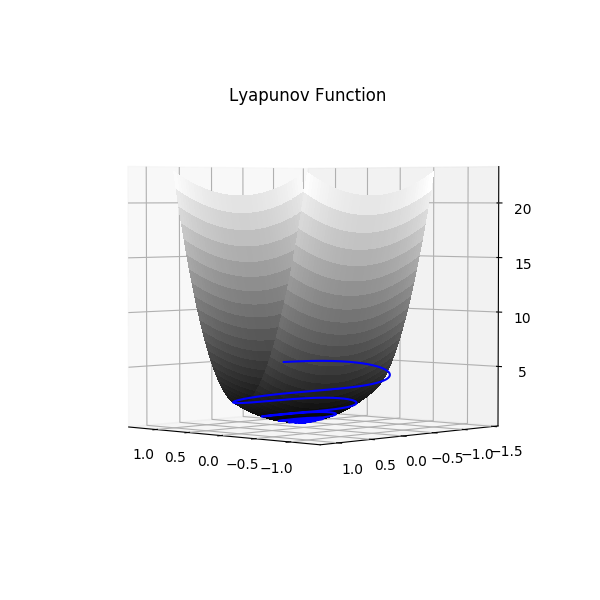

In [36]:
from scipy.integrate import odeint

t = np.linspace(0,30,num=10000)
Ax = lambda x, t: A.dot(x)
x0 = [0.5, -0.2]
xt = odeint(Ax, x0, t)

title = "Lyapunov Function"
axx = P[0,0]
ayy = P[1,1]
axy = 2*P[0,1]
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x,y)
Z = axx*X**2 + axy*X*Y + ayy*Y**2
zt = axx*xt[:,0]**2 + axy*xt[:,0]*xt[:,1] + ayy*xt[:,1]**2
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.gray,
                   linewidth=0, antialiased=False)
ax.plot3D(xt[:,0],xt[:,1],zt, 'b')
plt.title(title)
plt.axis('equal')
plt.show()

Note that the solution of this system is always decreasing along the surface of the lyapunov function. This is precisely what it means to have a valid lyapunov function and for the equilibrium point to be stable!